# ACF -- Ackerberg, Caves, Frazer
* This time, trying joint estimation
* Refer to ACF_simple_twostep for an easier version, which estimates $\Phi$ first with polynomial regression, then estimates the betas with GMM. 

# Review -- Two-Step Identification Procedure:
For a simple example, suppose $\omega_{it} = \rho \omega_{it-1} + \xi_{it}.$ Then
$g(x) = E[x|\omega_{it-1}] = \rho \omega_{it-1}.$ Assume labor is chosen after time $t-1$. Then the estimation procedure is: 

## (1) Regress $y_{it}$ on $\left(k_{it}, l_{it}, m_{it}\right)$ nonparametrically, or using a high-order polynomial, to obtain $\hat{\tilde \Phi}_t\left(k_{it}, l_{it}, m_{it}\right).$

We do this for every period to get a sequence of functions of $(k, l, m).$ These will be plugged in for $\Phi$ in the next step. 

## (2) Use the following four moment conditions to estimate the parameters $\left(\beta_0, \beta_k, \beta_l, \rho\right):$

$$
E\left[\left(y_{it} - \beta_0 - \beta_k k_{it} - \beta_l l_{it} - \rho\left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) - \beta_0 - \beta_k k_{it-1} - \beta_l l_{it-1}\right)\right) \otimes \begin{pmatrix} 1 \\ k_{it} \\ l_{it-1} \\ \tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) \\ \end{pmatrix} \right] = 0
$$

Here's where we use GMM. 

# New version: Joint Identification

Now, we include the parameters used to fit $\Phi$ into the GMM estimation. 
We fit $\Phi$ with a $d$-degree polynomial, and the coefficients of that polynomial are identified by moments.
In ACF, equation (31) shows their joint estimation moment conditions: 

$$
    E\begin{bmatrix}
    \varepsilon_{it} \big| \mathcal I_{it} \\ 
    \xi_{it}+\varepsilon_{it} \big| \mathcal I_{it-1}                
    \end{bmatrix} = 
    E\begin{bmatrix}
    y_{it} - \tilde\Phi_t(k_{it}, l_{it}, m_{it}) \;\; \big| \;\; \mathcal I_{it} \\ 
    y_{it} - \beta_0 - \beta_k k_{it} - \beta_l l_{it} - g\left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) - \beta_0 - \beta_k k_{it-1} - \beta_l l_{it-1}\right) \;\; \big| \;\; \mathcal I_{it-1}                
    \end{bmatrix} 
$$

where $g(\cdot)$ is the conditional expectation of productivity and $\mathcal I_{it}$ is the information set of firm $i$ at time $t$.  

The full $d$-degree polynomial fit of $y = \Phi_t(k, l, m)$ will have $\begin{pmatrix} k+d \\ k \end{pmatrix}$ coefficients, where $k$ is the number of variables (in this case 3). 

$$
\Phi_t^2(k, l, m) = \gamma_{0} + \gamma_{k}k + \gamma_{l}l + \gamma_{m}m + \gamma_{kl}kl + \gamma_{km}km + \gamma_{lm}lm + \gamma_{k^2}k^2 + \gamma_{l^2}l^2 + \gamma_{m^2}m^2
$$

So, assuming $g(x) = \rho x$, the vector of parameters to identify is: 

$$
\mathbf \theta = \left[ \beta_0, \beta_k, \beta_l, \rho,  \gamma_{0},  \gamma_{k}, ..., \gamma_{mm} \right]_{4 + kCd}
$$

The first four parameters can be identified using the moments from the "simple" ACF:  

$$
E\left[\operatorname{vec}\left(y_{it} - \beta_0 - \beta_k k_{it} - \beta_l l_{it} - \rho\left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) - \beta_0 - \beta_k k_{it-1} - \beta_l l_{it-1}\right)\right) \otimes \begin{pmatrix} 1 \\ k_{it} \\ l_{it-1} \\ \tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) \\ \end{pmatrix} \right] = 0
$$

Note that we will need to plug in the polynomial coefficients into the $\Phi$ here, from our parameter guess $\theta$. Also note that the final term with $\Phi$ in it is used as our moment for identifying $\rho$.

The $kCd$ "gammas" can be estimated using the moments for linear regression.

$$
\text{Regression:}\begin{pmatrix}
\mathbf 1^\intercal \left[ y_{it} - \tilde\Phi_t(k_{it}, l_{it}, m_{it})  \right] \\
 (k_{it})^\intercal \left[ y_{it} - \tilde\Phi_t(k_{it}, l_{it}, m_{it})  \right] \\
 (l_{it})^\intercal \left[ y_{it} - \tilde\Phi_t(k_{it}, l_{it}, m_{it})  \right] \\
 (m_{it})^\intercal \left[ y_{it} - \tilde\Phi_t(k_{it}, l_{it}, m_{it})  \right] \\
(k_{it}l_{it})^\intercal \left[ y_{it} - \tilde\Phi_t(k_{it}, l_{it}, m_{it})  \right] \\
\vdots \\
 (l_{it}^2)^\intercal \left[ y_{it} - \tilde\Phi_t(k_{it}, l_{it}, m_{it})  \right] \\
\end{pmatrix}
$$

Here we have $kCd$ moments fo the $kCd$ "gammas." 

# Error function implementation. 

Let $N_p = kCd$ be the number of polynomial terms. Then the GMM errors for the regression moments can be calculated using 

$$
\mathcal E_{\mathcal N_p\times 1} = X^\intercal \left[\left(Y - \Phi\right)\right]
$$

where $Y$ is the vector of $y_{it}$ observations, and   

$$
X^\intercal = \begin{bmatrix}
\mathbf 1^\intercal  \\
 \operatorname{vec}(k_{it})^\intercal  \\
  \operatorname{vec}(l_{it})^\intercal \\
  \operatorname{vec}(m_{it})^\intercal  \\
 \operatorname{vec}(k_{it}l_{it})^\intercal  \\
\vdots \\
  \operatorname{vec}(m_{it}^2)^\intercal \\
\end{bmatrix}
$$

is the transposed polynomial regression design matrix.

To get the errors for the "beta" moments, follow the same procedure as in the two-step ACF. 

# Jacobian Implementation: 
The Jacobian of the regression errros with respect to $\theta$ is: 

$$
X^\intercal 
    \begin{bmatrix}
    1^\intercal\frac{\partial\Phi}{\partial \gamma_0} & \cdots & 1^\intercal\frac{\partial\Phi}{\partial \gamma_{(m^2)}} \\
    \vdots & \ddots & \vdots \\
    (m^2)^\intercal\frac{\partial\Phi}{\partial \gamma_0} & \cdots & (m^2)^\intercal\frac{\partial\Phi}{\partial \gamma_{(m^2)}}
    \end{bmatrix}
    = X^\intercal X
$$


Next, let's find the Jacobian of the "beta" moment restrictions. The conditions are
$$
\left[ \begin{pmatrix} 1^\intercal \\ \operatorname{vec}(k_{it})^\intercal \\ \operatorname{vec}(l_{it-1})^\intercal \\ \operatorname{vec}\left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right)\right)^\intercal \\ \end{pmatrix} \cdot  h(\theta, \mathbf y, \mathbf k, \mathbf l)  \right]_{4\times 1} 
$$
where 
$$
h(\theta, \mathbf y, \mathbf k, \mathbf l) = \operatorname{vec}\left(y_{it} - \beta_0 - \beta_k k_{it} - \beta_l l_{it} - \rho\left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) - \beta_0 - \beta_k k_{it-1} - \beta_l l_{it-1}\right)\right).
$$
The Jacobian is: 

$$
\left[\frac{\partial e\left(\mathbf y, \mathbf k, \mathbf l|\theta\right)}{\partial \theta}\right] \equiv
$$



$$
\begin{bmatrix} \begin{bmatrix} 1^\intercal \\ \operatorname{vec}(k_{it})^\intercal \\ \operatorname{vec}(l_{it-1})^\intercal  \\ \operatorname{vec}(\Phi_{it-1})^\intercal \end{bmatrix}_{4\times n} \times \begin{bmatrix} \frac{\partial \mathbf h}{\partial \beta_0} & \frac{\partial \mathbf h}{\partial \beta_k} & \frac{\partial \mathbf h}{\partial \beta_l} & \frac{\partial \mathbf h}{\partial \rho} & \frac{\partial \mathbf h}{\partial \gamma_0} & \frac{\partial \mathbf h}{\partial \gamma_k} & \frac{\partial \mathbf h}{\partial \gamma_l} & \cdots & \frac{\partial \mathbf h}{\partial \gamma_{(m^2)}}  \end{bmatrix}_{n\times(4+ N_p)}
\end{bmatrix}  + h^\intercal \begin{bmatrix}
0\\
0\\
0\\
\begin{matrix}
0 &  0 &  0  & 0 & \left[\frac{\partial \Phi_\text{prev}}{\partial \gamma}\right]_{n\times N_p} 
\end{matrix}
\end{bmatrix}
$$


# Calculating the derivatives of h:

$$
\mathbf h = \operatorname{vec}\left(y_{it} - \beta_0 - \beta_k k_{it} - \beta_l l_{it} - \rho\left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) - \beta_0 - \beta_k k_{it-1} - \beta_l l_{it-1}\right)\right)
$$

$$
\frac{\partial \mathbf h}{\partial \beta_0} =  -1 + \rho
$$
$$
\frac{\partial \mathbf h}{\partial \beta_k} = -\operatorname{vec}(k_{it}) + \rho\operatorname{vec}(k_{it-1})
$$
$$
\frac{\partial \mathbf h}{\partial \beta_l} = -\operatorname{vec}(l_{it}) + \rho\operatorname{vec}(l_{it-1})
$$
$$
\frac{\partial \mathbf h}{\partial \rho} = \operatorname{vec}\left( - \left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) - \beta_0 - \beta_k k_{it-1} - \beta_l l_{it-1}\right)\right) 
$$
$$
\frac{\partial \mathbf h}{\partial \gamma_0} = -\rho \frac{\partial \mathbf \Phi_\text{prev}}{\partial \gamma_0} = 1
$$
$$
\frac{\partial \mathbf h}{\partial \gamma_k} = -\rho \frac{\partial \mathbf \Phi_\text{prev}}{\partial \gamma_k} = k_\text{prev}
$$
... for arbitrary polynomial term $x$... 
$$
\frac{\partial \mathbf h}{\partial \gamma_x} = -\rho \frac{\partial \mathbf \Phi_\text{prev}}{\partial \gamma_0^1} = x_\text{prev}
$$


$$
\mathbb A = \begin{bmatrix} \begin{bmatrix} 1^\intercal \\ \operatorname{vec}(k_{it})^\intercal \\ \operatorname{vec}(l_{it-1})^\intercal  \\ \operatorname{vec}(\Phi_{it-1})^\intercal \end{bmatrix}_{4\times n} \times 
\begin{bmatrix} 
\frac{\partial \mathbf h}{\partial \beta_0} & \frac{\partial \mathbf h}{\partial \beta_k} & \frac{\partial \mathbf h}{\partial \beta_l} & \frac{\partial \mathbf h}{\partial \rho} & -\rho 1  & -\rho k_\text{prev}  & \cdots & -\rho x_\text{prev} & \cdots &  -\rho m^2_\text{prev} \end{bmatrix}_{n\times(4+ N_p)}
\end{bmatrix}  
$$

$$
+  \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)^\intercal \begin{bmatrix} 
0 \\
0\\
0\\
\begin{matrix}
0 & 0 & 0 & 0 &  1  &  k_\text{prev}  & \cdots &  x_\text{prev}  & \cdots &   m^2_\text{prev} \end{matrix} \end{bmatrix}
$$

In summary, the entire Jacobian is 

$$
\begin{bmatrix}
A_{4\times(4+N_p)}\\
\begin{matrix}
0_{N_p\times 4} & X^\intercal X_{N_p\times N_p}
\end{matrix}
\end{bmatrix}
$$



# Load in the data


In [94]:
import autograd.numpy as np
from autograd import grad
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
import math
from itertools import combinations_with_replacement, chain
from scipy.linalg import block_diag

In [95]:
filename = "../PS3_data_changedtoxlsx.xlsx"
df0 = pd.read_excel(filename)

df = df0[['year', 'firm_id', 'X03', 'X04', 'X05', 'X40', 'X43', 'X44']]
#new_names = ["year", "firm_id", "obs", "ly", "s01", "s02", "lc", "ll", "lm"]
new_names = ["t", "firm_id", "y", "s01", "s02", "k", "l", "m"]

df.columns = new_names
#Keep industry 1 only
df=df[df['s02']==1]
#Creating lagged variables
df = df.sort_values(by=['firm_id', 't'])
df['kprev'] = df.groupby('firm_id')['k'].shift(1)
df['lprev'] = df.groupby('firm_id')['l'].shift(1)
df['mprev'] = df.groupby('firm_id')['m'].shift(1)
df['tprev'] = df.groupby('firm_id')['t'].shift(1)

# First step of coding: Write functions for the estimation of $\tilde \Phi_t.$

In [113]:
#This thing creates an iterator structure of tuples, used to create 
#the design matrix of polynomial interaction terms. 
def poly_terms(n_features, degree):
    #It looks something like this
    #(0,), (1,), (2,), (0, 0), (0, 1), etc 
    polynomial_terms = chain(
        *(combinations_with_replacement(range(n_features), d) for d in range(1, degree+1))
    )
    return(polynomial_terms)

#Create design matrix for the polynomial fit
def poly_design_matrix(xvars, degree):
    #In case there's only one variable to fit
    if xvars.ndim == 1:
        xvars = xvars.reshape(1, -1)
    # Get the number of samples (n) and number of features (m) from X
    n_samples, n_features = xvars.shape
    # Create polynomial terms iterator
    polynomial_terms = poly_terms(n_features, degree)
    # Start with a column of ones for the intercept term
    X_poly = np.ones((n_samples, 1))
    # Generate polynomial terms and interaction terms up to 4th degree
    for terms in  polynomial_terms:  # For degrees 1 to 4
            X_poly = np.hstack((X_poly, np.prod(xvars[:, terms], axis=1).reshape(-1, 1)))
    return X_poly

def fit_phi_poly(y, xvars, degree):
    #Get number of observations (n) and number of independent variables (k)
    #y = y.to_numpy()
    #DATA = DATA.to_numpy()
    if xvars.ndim == 1:
        xvars.reshape(1, -1)
    # Get the number of samples (n) and number of features (m) from X
    n_samples, n_features = xvars.shape
    
    # Start with a column of ones for the intercept term
    X_poly = np.ones((n_samples, 1))

    #Create iterator used to construct polynomial terms
    polynomial_terms = poly_terms(n_features, degree)
    
    # Generate polynomial terms and interaction terms up to 4th degree
    for terms in  polynomial_terms:  # For degrees 1 to 4
            X_poly = np.hstack((X_poly, np.prod(xvars[:, terms], axis=1).reshape(-1, 1)))
    
    # Compute the coefficients using the normal equation: beta = (X.T * X)^(-1) * X.T * y
    XT_X = X_poly.T @ X_poly
    XT_X_inv = np.linalg.inv(XT_X)
    XT_y = X_poly.T @ y
    gamma = XT_X_inv @ XT_y

    return gamma

def calculate_Phi(X_poly, Xprev_poly, gammas):
    #Calculating Phi
    Phi = X_poly@gammas
    Phiprev = Xprev_poly@gammas
    return Phi, Phiprev

#creates the first term in the moment restrictions:
def moment_error_ACF(theta, args_ykl, args_X, degree):
    #Load in argumetns
    #print("args_ykl:", args_ykl)
    y, k, l, kprev, lprev, t = args_ykl 
    X_poly, Xprev_poly, Jac_bottomblock = args_X
    #Reshape parameters theta. 
    Nobs = X_poly.shape[0]
    betas = theta[:4] #extract beta_0, beta_k, beta_l, and rho
    gammas = theta[4:] #extract the guesses for the polynomial fit coefficeints (gammas).
    #Calculate Phi
    Phi, Phiprev = calculate_Phi(X_poly, Xprev_poly, gammas)
    #Calculating errors
    y_minus_Phi = y - Phi
    #Matrix of errors for the gamma regression
    epsilons = (X_poly).T @ y_minus_Phi
    #Now calculate the moment restrictions vector for the betas. 
    moments_betas = (y - theta[0] - theta[1]*k - theta[2]*l - 
             theta[3]*(Phiprev - theta[0] - theta[1]*kprev- theta[2]*lprev ) )
    #Matrix of exclusion restrictions
    Vex = np.vstack([
        np.ones(Nobs), 
        k, 
        lprev,
    Phiprev
    ])
    err_betas = Vex@moments_betas
    #Put together all of the errors into a single vector. 
    error_vec = np.concatenate((err_betas, epsilons))
    return error_vec

def gmm_obj_ACF(theta, args_ykl, args_X, degree, W):
    #Arguments
    #Get the vector h(theta, y, k, l)
    moment_error = moment_error_ACF(theta, args_ykl, args_X, degree)
    #Calculate the weighted sum of the error using the weight matrix, W
    obj = moment_error.T@W@moment_error
    return obj

def gradient_ACF(theta, args_ykl, args_X, degree, W):
    #A lot of this code is repeated from moment_error_ACF -- Clean up later
    #Loading in 
    #for item in args_ykl:
    #    print(item)
    y, k, l, kprev, lprev, t = args_ykl 
    X_poly, Xprev_poly, Jac_bottomblock= args_X    
    Nobs = X_poly.shape[0]
    #Get useful indexes
    #Reshape parameters theta. 
    betas = theta[:4] #extract beta_0, beta_k, beta_l, and rho
    gammas = theta[4:] #extract the guesses for the polynomial fit coefficeints (gammas).
    #Reshaope the gammas into a dictionary, indexed by time t of the observations. 
    Phi, Phiprev = calculate_Phi(X_poly, Xprev_poly, gammas)
    
    #Now calculate the moment restrictions vector for the betas. 
    moments_betas = (y - theta[0] - theta[1]*k - theta[2]*l - 
             theta[3]*(Phiprev - theta[0] - theta[1]*kprev- theta[2]*lprev ) )

    #Now we have Phi, Phiprev, and "moments_betas"(h). 
    #Next, calculate the Jacobian 
    Jac = np.zeros((theta.size, theta.size))
    #Next, create the portion of the Jacobian related to the moments which identify the betas.
    #Matrix of exclusion restrictions
    #now get dMomentsBeta/dBeta
    #Partial derivatives of h
    Dh = np.nan_to_num(np.vstack(
        [
         np.ones(k.shape[0])*(-1 + theta[3]),  #dh/dbeta0  
         -k + theta[3]*kprev,             #dh/dbetak
         -l + theta[3]*lprev,             #dh/dbetal
         -(Phiprev - theta[0] - theta[1]*kprev - theta[2]*lprev) #dh/drho
        ]
    ),  nan=0).T
    #Get the vector h(theta, y, k, l)
    moment_error = moment_error_ACF(theta, args_ykl, args_X, degree = 2)
    #now for dMomentsBeta/dGamma
    #Need the polynomial design matrix associated with kprev, lprev, mprev    
    #Get the top block of the Jacobian (except one missing term)
    Vex = np.vstack([
        np.ones(Nobs), 
        k, 
        lprev,
        Phiprev
    ])
    Jac_topblock_almost = Vex@np.hstack((Dh, -theta[3]*Xprev_poly))
    #Final missing term      "h" function here 
    Jac_topblock_lastrow = (moments_betas).T@Xprev_poly
    #Combine
    Jac_topblock = Jac_topblock_almost
    Jac_topblock[3, 4:] = Jac_topblock[3, 4:] + Jac_topblock_lastrow 
    #Fill in the full Jacobian
    Jac[:4, :] = Jac_topblock
    Jac[4:, 4:] = Jac_bottomblock
    #Now that we have the Jacobian, calculate the gradient. 
    Grad = (2*Jac.T @ W @ moment_error)
    return Grad


# Get an inital guess for the polynomial coefficients, using regression

In [114]:
degree = 2
y = df['y'].to_numpy()
xvars = df[['k', 'l', 'm']].to_numpy()
gammas0 = fit_phi_poly(y, xvars, degree)
#gammas0 = np.concatenate(list(gammas0_dict.values()))

# Defining terms used in estimation

In [115]:
#Getting objects we will use in estimation
df_nonans =df.dropna()
#df.loc[df.isna().any(axis=1)] = 0
degree = 2
xvars = df_nonans[['k', 'l', 'm']].to_numpy()
Nobs = df_nonans.shape[0]
#gamma_guess = fit_phi_poly(df['y'].to_numpy(), xvars, degree)
X_poly = poly_design_matrix(xvars, degree)
NPolyTerms = X_poly.shape[1]
#Initial parameter guess
theta = np.ones(4 + NPolyTerms)/10
#GMM weighting matrix
W = np.eye(4 + NPolyTerms)
#
y = df_nonans['y'].to_numpy() 
k = df_nonans['k'].to_numpy()  
l = df_nonans['l'].to_numpy()  
kprev = df_nonans['kprev'].to_numpy()  
lprev = df_nonans['lprev'].to_numpy() 
t = df_nonans['t'].to_numpy() 
#Pieces used in the evaluation of the objective function
#Pieces of the Jacobian
xvars_prev = df_nonans[['kprev', 'lprev', 'mprev']].to_numpy()
Xprev_poly = poly_design_matrix(xvars_prev, degree)
# Set rows with any NaN values to zeros
XTX = (X_poly).T@X_poly
Jac_bottomblock = -XTX

# Jacobian's upper block: the derivative of the "beta moments" w.r.t. the "gammmas"
block_dgamma = Xprev_poly

args_ykl = (y, k, l, kprev, lprev, t)
args_X = (X_poly, Xprev_poly, Jac_bottomblock)


In [116]:
autogradient = grad(gmm_obj_ACF)

In [117]:
theta0 =  np.zeros(4 + NPolyTerms)
theta0[:4]=1/2 #Guesses 
theta0[4:]=gammas0.reshape(NPolyTerms,)
degree = 2
moment_err = moment_error_ACF(theta0, args_ykl, args_X, degree)

#autogradient(theta0, args_ykl, args_X, args_time_index)
my_grad = gradient_ACF(theta0, args_ykl, args_X, degree, W)
autograd_grad = autogradient(theta0, args_ykl, args_X, degree, W) #slow
#Comparing my gradient with AutoGrad's


# Checking whether my gradient is correct

It's pretty close. 

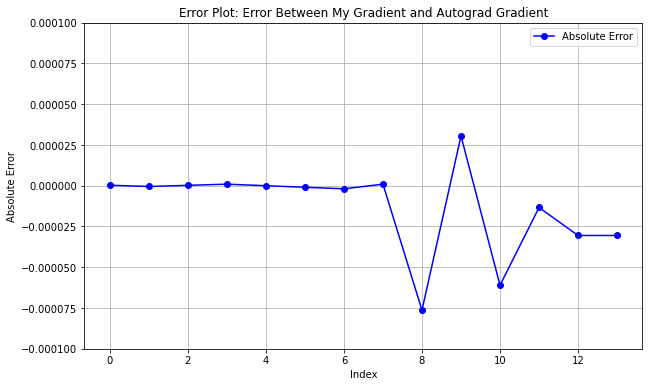

In [125]:
# Step 2: Calculate the absolute error
error = (my_grad - autograd_grad)

# Step 3: Create the error plot
plt.figure(figsize=(10, 6))
plt.plot(error, marker='o', linestyle='-', color='b', label='Absolute Error')
plt.title('Error Plot: Error Between My Gradient and Autograd Gradient')
plt.xlabel('Index')
plt.ylabel('Absolute Error')
#plt.xticks(np.arange(len( autograd_grad)), labels=[f'Value {i+1}' for i in range(len( autograd_grad))])
plt.ylim(-1/10000, 1/10000)
plt.grid()
plt.legend()
plt.show()

## My gradient is very close. Plotting the two on top of each other, they are indistinguishable. 

## Now, use a minimization routine, with the Jacobian, to optimize for theta. 

In [127]:
theta0 =  np.zeros(4 + NPolyTerms)
theta0[0] = 0
theta0[1:3]=1/2 #Guesses 
#theta0[1:3] = np.array([-0.1, 2.3])
theta0[3] = 0.9
theta0[4:]=gammas0.reshape(NPolyTerms,)
degree = 2

#gmm_args = (df, X_poly, W0)
gmm_args = (args_ykl, args_X, degree, W)

#Solving using my own gradient
#theta_results_grad = opt.minimize(gmm_obj_ACF, theta0, args=gmm_args,
#                       tol=1e-14, jac=gradient_ACF, method='L-BFGS-B')
theta_results_grad = opt.minimize(gmm_obj_ACF, theta0, args=gmm_args,
                       tol=1e-14, jac=gradient_ACF, method='L-BFGS-B')
#Solving without providing a gradient
theta_result = theta_results_grad.x


print("The GMM error is:", gmm_obj_ACF(theta_result, *gmm_args))
print("The estimates are: [beta_k, beta_l] = ", theta_result[1:3])
print("The gradient is: ", gradient_ACF(theta_result, *gmm_args))


gammas_gmm = theta_result[4:]

#print("The slope of the AR(1) of productivity is: rho = ", rho)

The GMM error is: 2.1859299472171236
The estimates are: [beta_k, beta_l] =  [0.7021958  0.60323372]
The gradient is:  [ 8.93424079e-01  2.09550651e+01 -8.70785159e+00  1.14404083e+02
 -1.48739341e+00  9.70976469e+01  4.50655014e+01  7.42528984e+01
  2.34858656e+03  9.41185375e+02  2.21877922e+03  3.71132770e+02
  8.85122926e+02  2.00913114e+03]


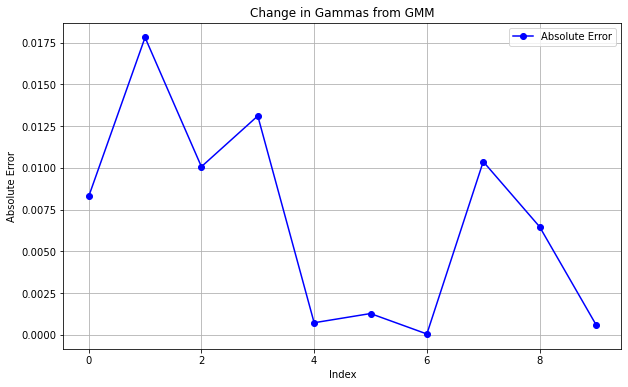

In [129]:
#How much have the gammas changed since the initial guess? 
gammas_change = np.abs(gammas0 - gammas_gmm)

# Step 3: Create the error plot
plt.figure(figsize=(10, 6))
plt.plot(gammas_change, marker='o', linestyle='-', color='b', label='Absolute Error')
plt.title('Change in Gammas from GMM')
plt.xlabel('Index')
plt.ylabel('Absolute Error')
#plt.xticks(np.arange(len( autograd_grad)), labels=[f'Value {i+1}' for i in range(len( autograd_grad))])
plt.grid()
plt.legend()
plt.show()